# EDA (Exploratory Data Analysis)

1. load datasets

2. clean data (missing values, duplicates ,types)

3. treat ouliers

4. univariate , bivariate and multivariate analysis

5. insights

outlier - a data ppoint that is significantly different from other observations in a dataset.

How outliers will come---?
1. Measurement errors
2. data entry mistakes

Why they are important---?
1. They can be errors
2. They effect the data analysis

How to identify the outliers---?
1. statistical methods<br>
---> Interquartile Range (IQR)<br>
---> z-Score
2. visuvalization tech<br>
---> Box Plots<br>
--->scatter plot<br>
---> Histograms

### univariate analysis - a method that analyzes a single variable to describe its characteristics,find patterns and summarize data.
#### It involves only one variable.
### Bivariate analysis - it will give relationship between two variables. It helps to find if there is an co-relation , association or connection b.w the 2 variables.
#### It involves 2 variable (x & y)
### Multivariate analysis - It understand how multiple factors interact & influence each other.
#### It involves more then 2
Examlple -
How our age ,income and education level together influence the purchasing behavior.

# ETL (Extract Transform Load)

# ETL

## EDA : < Dataset >

1. load & overview

2. cleaning (missing, dupes, dtypes)

3. Uni, Bi & Multi analysis

4. outliers - IQR

5. Feature Engineering

6. Key Insights

### Feature Engineering - " F.E is the process of turning raw data into useful features " that helps to improve the perfomance of machine learning models.

# 1.Load libraries & Dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Load dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
# basic information & overview of dataset
print("shape of dataset:",df.shape)
print("data info:\n",df.info())

#summary statistics
df.describe(include='all')


shape of dataset: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
data info:
 None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Missing values analysis
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': df.isnull().mean() * 100
})

missing.sort_values(by='missing_percentage', ascending=False)

,missing_count,missing_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


In [67]:
# 4. Handling missing values

# Fill the numeric missing values with mean
df['age'] = df['age'].fillna(df['age'].mean())

# Fill the categorical missing values with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop the column with high missing values
df = df.drop(columns=['deck'])

print("missing values after cleaning \n",df.isnull().sum().sum())



missing values after cleaning 
 2


In [68]:
# Missing values analysis
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': df.isnull().mean() * 100
})

missing.sort_values(by='missing_percentage', ascending=False)

,missing_count,missing_percentage
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,0,0.000000
class,0,0.000000


Insight : We filled important columns and removed highly missing ones.

this keeps maximum information while making the dataset clean

In [69]:
# Duplicate & data type check

print("Duplictaed rows: ",df.duplicated().sum())

# Convert some columns to category type
df['class'] = df['class'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['sex'] = df['sex'].astype('category')

df.info()

Duplictaed rows:  111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


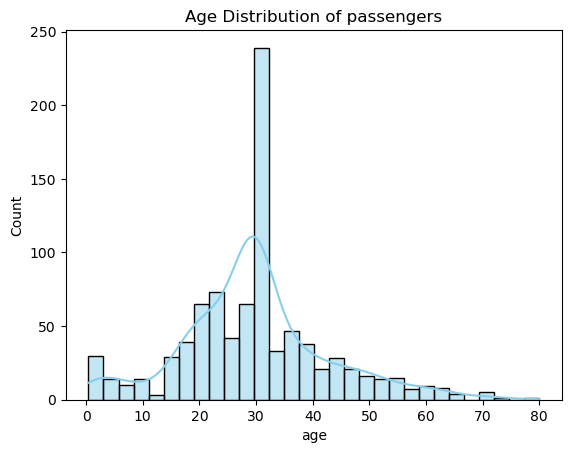

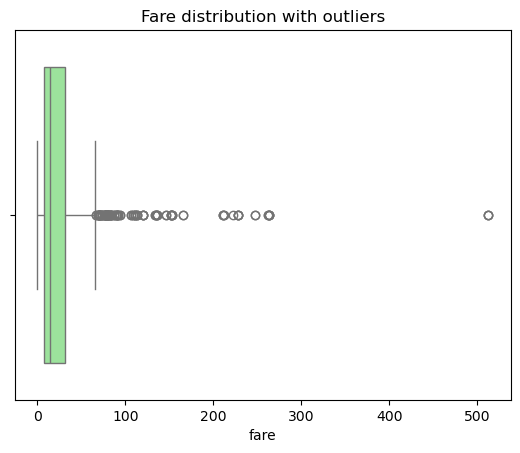

In [71]:
# 6. univariate analysis -Numerical Features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe()

#Histograms : Age
sns.histplot(data=df, x='age', kde=True,color='skyblue')
plt.title('Age Distribution of passengers')
plt.show()

#Boxplot : fare
sns.boxplot(data=df, x='fare', color='lightgreen')
plt.title('Fare distribution with outliers')    
plt.show()

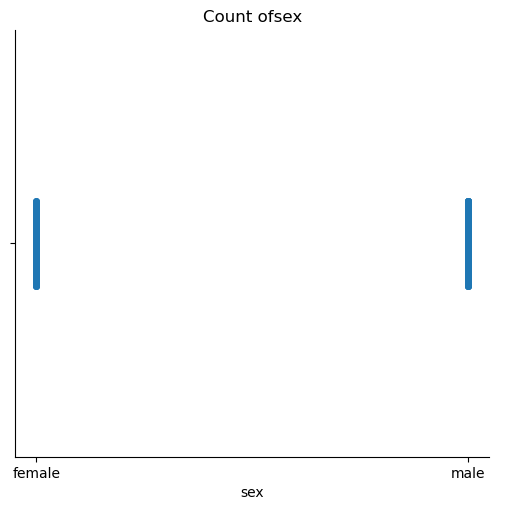

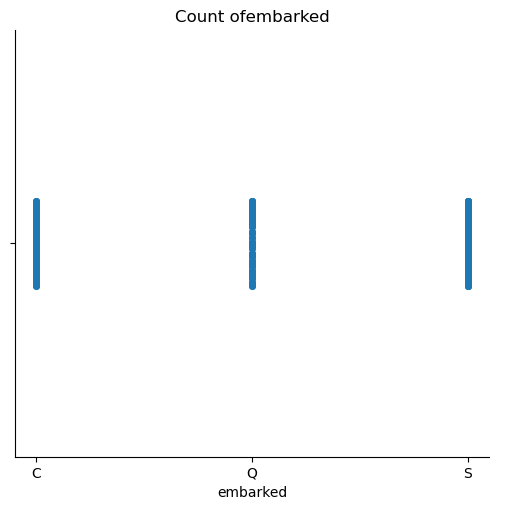

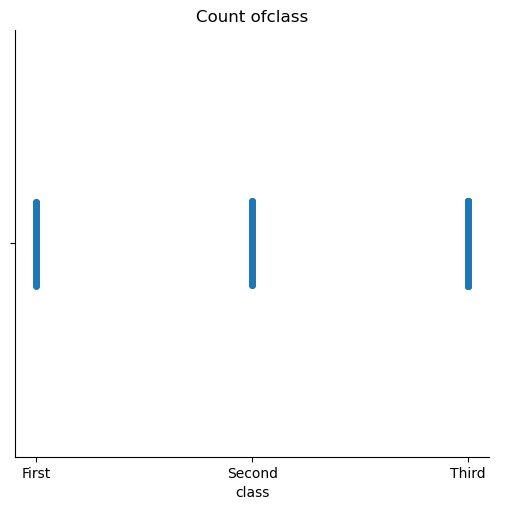

In [77]:
#univariate Analysis - Categorical Features
cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of{col}")
plt.show()

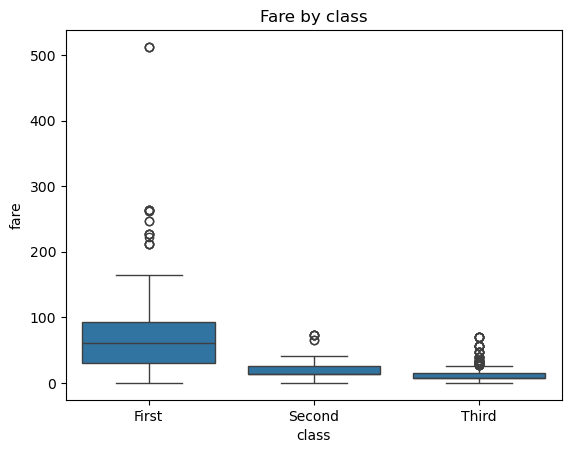

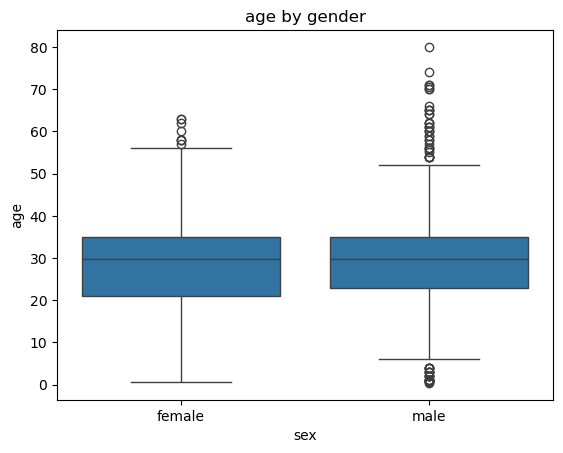

In [78]:
# Bivariate Analysis - Numerical & Categorical

sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("age by gender")
plt.show()


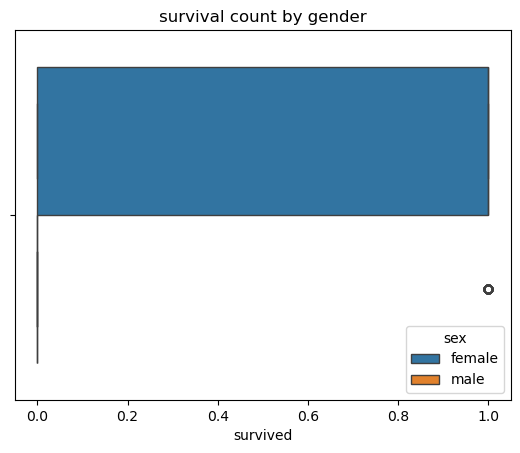

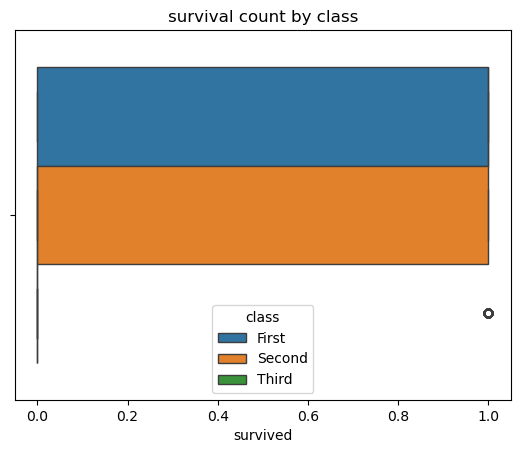

In [83]:
# bivariate Analysis - Categorical & Categorical

sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survival count by gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("survival count by class")
plt.show()

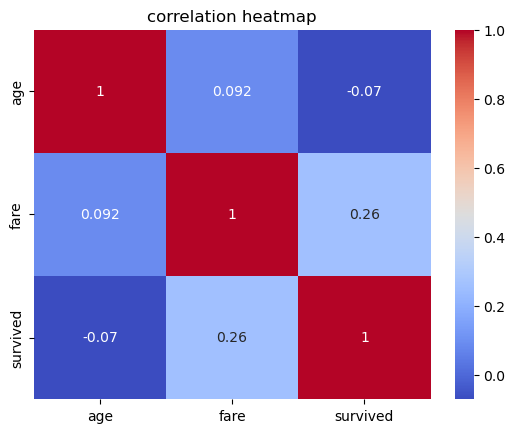

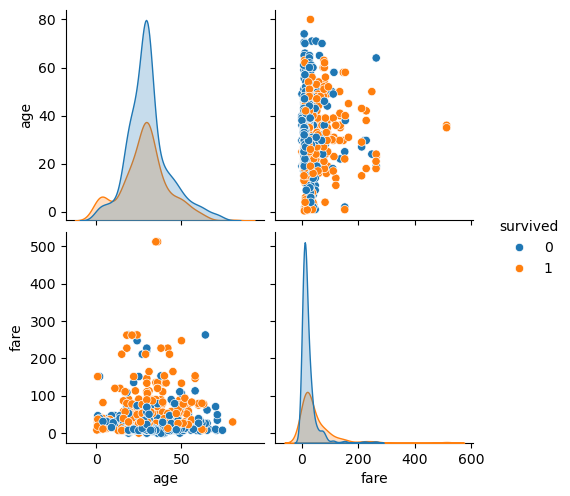

In [88]:
# corelation and multivariate analysis

corr= df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Insights:

1. Fare has a positive correlation with survival

2. Age shows a slight negative correlation with survival


Number of outliers in fare: 116


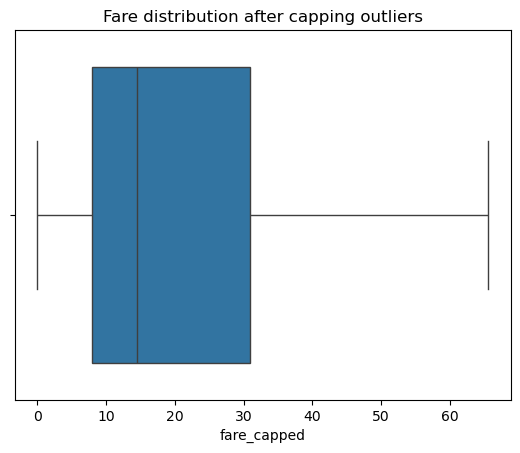

In [92]:
# outlier detection using IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print("Number of outliers in fare:", len(outliers))

#outliers
df['fare_capped'] = df['fare'].clip(lower_bound, upper_bound)
sns.boxplot(x=df['fare_capped'])
plt.title('Fare distribution after capping outliers')
plt.show()

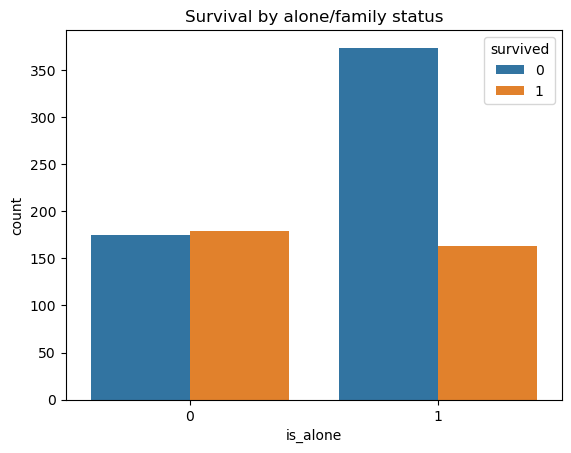

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [95]:
# feature engineering - creating new features

df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] ==1).astype(int)

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("Survival by alone/family status")
plt.show()

df[['family_size','is_alone','survived']].head()

In [96]:
# Export cleaned dataset
df.to_csv('titanic_cleaned.csv',index=False)
print("Cleaned dataset exported as 'titanic_cleaned.csv'")

Cleaned dataset exported as 'titanic_cleaned.csv'


In [97]:
import os
print(os.getcwd())

/Users/dhanushyadav/Desktop/Data_Analysis/week2
